# Data Wrangling and Analysis of WeRateDogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Part   I: Data Wrangling</a></li>
    <ul>
    <li><a href="#gather">Gathering</a></li>
    <li><a href="#assess">Assessing</a></li>
    <li><a href="#clean">Cleaning</a></li>
    </ul>

<li><a href="#analysis">Part   II: Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
### Introduction:

<a href="https://en.wikipedia.org/wiki/WeRateDogs">**WeRateDogs**</a> is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter for breaking these aforementioned laws. 



In this project we are going to <a href="#wrangling">wrangle</a> and <a href="#analysis">analyze</a> the tweet archive of Twitter user <a href="https://twitter.com/dog_rates">@dog_rates</a>.

This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017,   to make this Twitter archive "enhanced." Of the 5000+ tweets, it has been filtered for tweets with ratings only (there are 2356).

In this notebook, We are going to read the archive and download the missing data (retweet count and favorite count) via twitter API, w'll download also the tweet image predictions data using python requests, w'll assess and clean our datasets next, finally we analyze the cleaned versions where w'll try to see the relationship between dog category and/or ratings and twitter metrics (favorite, retweet), our analysis will answer the following questions:
* Do the rating affect the popularity of the tweet ?
* Do the dog stage or breed affect the rating ?
* Is there any dog stage or breed more popular than the others ?

Before we start, Let's import the necessary libraries and prepare our envirement.

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('ggplot')
%matplotlib inline

<a id='wrangling'></a>
### Part   I: Data Wrangling:

<a id="gather"></a>
<ul><li><h3>Gathering</h4></li></ul>

Loading the `twitter-archive-enhanced.csv` file into a DataFrame and printing the first few lines.

In [2]:
# loading the file into a DataFrame
enhanced_tweets = pd.read_csv('twitter-archive-enhanced.csv')

# Printing the first few lines to Check if the file was imported correctly
enhanced_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Now we need to download the `image-predictions.tsv` file, save it and import it into a DataFrame

In [3]:
# Setting the file url
img_predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Downloading the file
response = requests.get(img_predict_url)

# Saving the file
with open((img_predict_url.split('/')[-1]), mode= 'wb') as f:
    f.write(response.content)

# loading the file into a DataFrame
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# Printing the first few lines to Check if the file was imported correctly
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Using the tweet IDs in the WeRateDogs Twitter archive, we are going to query the Twitter API for each tweet's JSON data using Python's Tweepy library and storing each tweet's entire set of JSON data in a file called `tweet_json.txt` .

In [5]:
# Authentication with twitter
config_file = '.tweepy.json'

# opening the configuration file where we stored our key and tokens
with open(config_file) as cf:
    config = json.load(cf)

auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

twitter = tweepy.API(auth, wait_on_rate_limit=True)


In [6]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = enhanced_tweets.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
fails_dict = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        # Downloading the successfull request with try,
        try:
            tweet = twitter.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        # Handling errors by except
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
        


Parsing and importing the `tweet_json.txt` into a DataFrame

In [7]:
api_tweets = []
with open('tweet_json.txt') as f:
    # reading the tweet_json.txt line by line
    for line in f:
        # Convert to dictionary
        dic = json.loads(line[:-1])
        
        # appending the dictionary to the api_tweets list
        api_tweets.append({'id' : dic['id'],
                           'retweet_count': dic['retweet_count'],
                           'favorite_count': dic['favorite_count']
                           })

# Converting the api_tweets list to a DataFrame
api_tweets = pd.DataFrame(api_tweets)

# Saving the dataframe
api_tweets.to_csv('tweet_json.csv', index= False)

# Printing the first few lines to Check if the file was imported correctly
api_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,7788,36584
1,892177421306343426,5769,31519
2,891815181378084864,3818,23752
3,891689557279858688,7960,39907
4,891327558926688256,8594,38108


<a id="assess"></a>
<ul><li><h3>Assessing</h4></li></ul>

`enhanced_tweets` DataFrame

Visual assessment

In [8]:
enhanced_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- programmatic Assessement:



Checking for retweets

In [9]:

enhanced_tweets[(enhanced_tweets.in_reply_to_status_id.notna()|
                 enhanced_tweets.in_reply_to_user_id.notna() | 
                 enhanced_tweets.retweeted_status_id.notna() | 
                 enhanced_tweets.retweeted_status_user_id.notna()| 
                 enhanced_tweets.retweeted_status_timestamp.notna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


Checking for duplicated rows

In [10]:
enhanced_tweets.duplicated().sum()

0

Checking the data types

In [11]:
enhanced_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Checking the distribution of the numerical values

In [12]:
enhanced_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Checking the denominator values

In [13]:
enhanced_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

checking the numerator values

In [14]:
enhanced_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
enhanced_tweets.rating_denominator.idxmin()

313

In [16]:
enhanced_tweets.text.iloc[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

Checking the name column

In [17]:
enhanced_tweets.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Gert         1
Andru        1
Stuart       1
Buckley      1
Ginger       1
Name: name, Length: 957, dtype: int64

Checking the dog stage columns

In [18]:
enhanced_tweets.doggo.value_counts(), enhanced_tweets.floofer.value_counts(), enhanced_tweets.pupper.value_counts(), enhanced_tweets.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

Checking if there is some uncategorized dogs

In [19]:
enhanced_tweets.query('doggo == "doggo" and floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [20]:
enhanced_tweets.query('doggo == "doggo" and pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [21]:
enhanced_tweets.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [22]:
len(enhanced_tweets.query('doggo != "doggo" and floofer != "floofer" and pupper != "pupper" and puppo != "puppo" '))

1976

`img_predictions` DataFrame

Visual assessment

In [23]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Checking the data types and null values

In [24]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Checking for duplicated rows

In [25]:
img_predictions.duplicated().sum()

0

Checking The distribution of numerical values

In [26]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
img_predictions.query('p1_conf == 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


Checking if the probabilities confidences sum up to one

In [28]:
img_predictions.query('(p1_conf + p2_conf + p3_conf ) > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


checking the prediction values

In [29]:
img_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
robin                   1
swab                    1
hay                     1
crane                   1
orange                  1
Name: p1, Length: 378, dtype: int64

In [30]:
img_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False').p1.value_counts()

web_site            13
teddy                6
home_theater         6
doormat              5
porcupine            5
                    ..
Angora               1
three-toed_sloth     1
flamingo             1
platypus             1
china_cabinet        1
Name: p1, Length: 212, dtype: int64

#### Quality
##### `enhanced_tweets` table
- in general tweets with a rating under 5 are not for dogs.
- 181 retweets
- Erroneous datatypes:
 * timestamp and retweeted_status_timestamp type is string not a datetime.
 * in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id type is float not an int.
 * source is string not category.
 * dog stage columns string not category.
- some rows has repeated entries in expanded_url and others with null values.
- source has the full html tag
- not all dog names are extracted (745 none, and 55 a)
- some rows have multiple dog stages 
- not all dogs are classified (Dog Stage missing), some are multiclassified. 
- Erroneous denominator value (0)
- some rows has denominator value different than 10 (2, 7, 11 or multiple of 10)



##### `img_predictions` table:

- one row with sum of probabilities bigger than 1
- all jpg_url starts with https://pbs.twimg.com
- predictions with an '_' as words separation
- Non meaningfull column names

#### Tidiness
##### `enhanced_tweets` table
- dog stages are 4 separate columns
- expanded_urls is just a static url + tweet_id
- since we need only original tweets in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns has no usefull use after removing replies and non original tweets.
- `Api_tweets` columns belongs to `enhanced_tweets`

##### `img_predictions` table:

- image_name contain two variables (folder name and image name) in one column.
- p#_dog is a repetition (it can be inferred from p)


<a id="clean"></a>
<ul><li><h3>Cleaning</h4></li></ul>

In [31]:
enhanced_tweets_clean = enhanced_tweets.copy()
api_tweets_clean = api_tweets.copy()
img_predictions_clean = img_predictions.copy()

##### `rating_denominator` and  `rating_numerator` erroneous values
- Define: extract the rating from the text and assign the nominator and denominator to their respective columns

- code

In [32]:
import re

def rating(text, ret ):
    """
    extract the rating from the text and return either the last found numerator or denominator
    param:
    text: from which we extract
    ret: 'numerator' or 'denominator' to be returned
    """
    matches = [m for m in re.findall('\d+\/\d+', text)][-1].split('/')
        
    if ret == 'numerator':
        return int(matches[0])
    elif ret == 'denominator':
        return int(matches[1])

In [33]:
enhanced_tweets_clean['rating_numerator'] = enhanced_tweets_clean.text.apply(rating, ret='numerator')
enhanced_tweets_clean['rating_denominator'] = enhanced_tweets_clean.text.apply(rating, ret='denominator')

- testing

In [34]:
enhanced_tweets_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,12.707131,10.440577
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,41.511986,6.687209
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,7.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Non original tweets and not all are dog ratings
- Define: remove the retweets and replies from all tables

- Code:

In [35]:
# Retrieve the tweet_id of the retweets and replies as well the ones which are not for dog image rating
# in general rating under 5 is for images that doesn't contain dogs
to_be_removed = enhanced_tweets_clean[((enhanced_tweets_clean.rating_numerator < 5 )|
                                       enhanced_tweets_clean.text.str.contains("Doesn't bark")|
                                       enhanced_tweets_clean.text.str.contains("No bark")|
                                       enhanced_tweets_clean.text.str.contains("Bark barely")|
                                       enhanced_tweets_clean.text.str.contains("2 legs")|
                                       enhanced_tweets_clean.text.str.contains("unfluffy")|
                                       enhanced_tweets_clean.text.str.contains("Not fluffy")|
                                       enhanced_tweets_clean.text.str.contains("odd dog")|
                                       enhanced_tweets_clean.text.str.contains("quite the dog")|
                                       enhanced_tweets_clean.text.str.contains("Bad dog")|
                                       enhanced_tweets_clean.text.str.contains("Has wings")|
                                       enhanced_tweets_clean.text.str.contains("Not soft")|
                                       enhanced_tweets_clean.text.str.contains("video")|
                                       enhanced_tweets_clean.in_reply_to_status_id.notna()| 
                                       enhanced_tweets_clean.in_reply_to_user_id.notna() | 
                                       enhanced_tweets_clean.retweeted_status_id.notna() | 
                                       enhanced_tweets_clean.retweeted_status_user_id.notna()| 
                                       enhanced_tweets_clean.retweeted_status_timestamp.notna() )]['tweet_id'].values


In [36]:
# Retrieve the index of the tweets to be removed from enhanced_tweets_clean table
etc_ind = enhanced_tweets_clean.query('tweet_id in @to_be_removed').index

# Drop the retweets and replies from enhanced_tweets_clean table
enhanced_tweets_clean = enhanced_tweets_clean.drop(etc_ind)


In [37]:
# Retrieve the index of the tweets to be removed from api_tweets_clean table
atc_ind = api_tweets_clean.query('id in @to_be_removed').index

# Drop the retweets and replies from api_tweets_clean table
api_tweets_clean = api_tweets_clean.drop(atc_ind)


In [38]:
# Retrieve the index of the tweets to be removed from api_tweets_clean table
ipc_ind = img_predictions_clean.query('tweet_id in @to_be_removed').index

# Drop the retweets and replies from api_tweets_clean table
img_predictions_clean = img_predictions_clean.drop(ipc_ind)

- Test:

In [39]:
enhanced_tweets_clean.query('tweet_id in @to_be_removed')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
api_tweets_clean.query('id in @to_be_removed')

,id,retweet_count,favorite_count


In [41]:
img_predictions_clean.query('tweet_id in @to_be_removed')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


##### 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns

- define: Drop Those columns


- code:

In [42]:
enhanced_tweets_clean = enhanced_tweets_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id',
                                                    'retweeted_status_timestamp'], axis=1)

- test: 

In [43]:
# Confirm the columns are gone
enhanced_tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### Denominator value different than 10 (2, 7, 11 or multiple of 10)
- Define: normalize the entries by deviding the denominator and numerator by the multiple

- code:

In [44]:
# Finding the multiple
multiple = enhanced_tweets_clean.rating_denominator / 10

# Normalizing the denominator
enhanced_tweets_clean.rating_denominator = (enhanced_tweets_clean.rating_denominator / multiple).astype(int)

# Normalizing the numerator
enhanced_tweets_clean.rating_numerator = (enhanced_tweets_clean.rating_numerator / multiple).astype(int)

- test

In [45]:
enhanced_tweets_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.037000e+03,2037.000000,2037.0
mean,7.380286e+17,11.927344,10.0
std,6.730790e+16,40.213742,0.0
min,6.660209e+17,5.000000,10.0
25%,6.775479e+17,10.000000,10.0
50%,7.119681e+17,11.000000,10.0
75%,7.899036e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [46]:
enhanced_tweets_clean.rating_denominator

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2037, dtype: int32

##### Missing dog names
- Define: extract the dog name and assign it to its column

- code

In [47]:
# Defining the function with which we gonna retrieve the name fron the text

def get_name(x):
    """
    Retreive the dog's name from a text.
    param:
    x: string containing the full tweet text
    
    return the dog's name or '-' if no name can be found in the text
    """
    # Lower the text to avoid mismatches
    x = x.lower()
    
    # The actual function that retrieve the name
    def fetch_name(pre_name):
        
        # Detecting the text after the pre_name
        text = x.split(pre_name, maxsplit=1)[-1]
    
        # Retrieving the phrase containing the name
        phrase = text.split('.')[0]
        
        # Retrieve the list of the full name from the phrase
        lst = phrase.split()[0:]
    
        # Concatinating the list into one string separated by a space
        sep = ' '
        
        return  sep.join(lst)
    
        
    # Defining the different words / phrases that preceed the dog name 
    name = '-'
    
    if "named " in x:
        name = fetch_name("named ")
    
    elif "his name is " in x:
        name = fetch_name("his name is ")
        
    elif "called " in x:
        name = fetch_name("called ")
        
    elif "this is a " in x:
        name = fetch_name("this is a ")
    
    elif "this... is a " in x:
        name = fetch_name("this... is a ")
        
    elif "this is " in x:
        name = fetch_name("this is ")
        
    elif "here's a " in x:
        name = fetch_name("here's a ")
    
    elif "meet " in x:
        name = fetch_name("meet ")
        
    elif "this was " in x:
        name = fetch_name("this was ")
        
    elif "here we have a " in x:
        name = fetch_name("here we have a ")
       
    elif "i present to you, " in x:
        name = fetch_name("i present to you, ")
        
        
    return name
 

In [48]:
# Retrieving and assigning the names from the text column
enhanced_tweets_clean['name'] = enhanced_tweets_clean.text.apply(get_name)

- test

In [49]:
enhanced_tweets_clean.name.value_counts()

-           591
charlie      10
lucy         10
cooper        9
tucker        9
           ... 
chelsea       1
pilot         1
clifford      1
mabel         1
aubie         1
Name: name, Length: 1061, dtype: int64

Not all status has dogs name

##### Full Html tag in `source` column
- Define: extract and assign just the source category from the full source text

- code:

In [50]:
from bs4 import BeautifulSoup

def get_s_cat(x):
    """
    scrap the content from the full html tag.
    param:
    x: string containing the full tag
    
    return the category without the html code
    """
    soup = BeautifulSoup(x, 'lxml')
    cat = soup.find('a').contents[0]
    
    return cat

In [51]:
enhanced_tweets_clean['source'] = enhanced_tweets_clean.source.apply(get_s_cat)

- test:

In [52]:
enhanced_tweets_clean['source'].value_counts()

Twitter for iPhone     1906
Vine - Make a Scene      91
Twitter Web Client       29
TweetDeck                11
Name: source, dtype: int64

some rows have multiple dog stages assigned
##### Rows with multiple Dog Stages
- Define: extract 'doggo', 'floofer','pupper' or 'puppo' from text and assign it to a dog_stage column

- code:

In [53]:
def get_stage(x):
    """
    extract all dog stages from the text.
    param:
    x: string containing the text
    
    return the last dog stage found in the text or if not the default stage
    as floofer is any dog (especially with excess of fur), so it is set as the default one
    """
    
    # Lower the letters to avoid mismatches
    x = x.lower()
    
    stages = {'floofer': 0}
    
    if 'big' in x:
        stages['doggo'] = 1
    
    if 'old' in x:
        stages['doggo'] = 1
        
    if 'small' in x:
        stages['pupper'] = 1
        
    if 'young' in x:
        stages['pupper'] = 1
        
    if 'doggo' in x:
        stages['doggo'] = x.find('doggo')
    if 'floofer' in x:
        stages['floofer'] = x.find('floofer')
    if 'pupper' in x:
        stages['pupper'] = x.find('pupper')
    if 'puppo' in x:
        stages['puppo'] = x.find('puppo')
        
    # if multiple stages are found, 
    # look for the last stage mentioned in the text
    key_max = max(stages, key=stages.get)
    
    return key_max
    

In [54]:
enhanced_tweets_clean['dog_stage'] = enhanced_tweets_clean.text.apply(get_stage)

- test:

In [55]:
enhanced_tweets_clean.dog_stage.value_counts()

floofer    1582
pupper      254
doggo       173
puppo        28
Name: dog_stage, dtype: int64

#####  All jpg_url starts with https://pbs.twimg.com/ and end with.jpg in `img_predictions` table
- Define: strip https://pbs.twimg.com/ and .jpg from jpg_url, and then rename the column to image_name.


- code:


In [56]:
# Remove https://pbs.twimg.com/media/ from the start
img_predictions_clean['jpg_url'] = img_predictions_clean.jpg_url.str.replace('https://pbs.twimg.com/', '')
# Remove .jpg from the end
img_predictions_clean['jpg_url'] = img_predictions_clean.jpg_url.str.replace('.jpg', '')

# Rename the column
img_predictions_clean = img_predictions_clean.rename(columns={"jpg_url": "image_name"})


- test:

In [57]:
img_predictions_clean.head()

,tweet_id,image_name,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,media/CT4udn0WwAA0aMy,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,media/CT42GRgUYAA5iDo,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,media/CT4521TWwAEvMyu,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,media/CT5Dr8HUEAA-lEu,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,media/CT5IQmsXIAAKY4A,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Image_name contain two variables (folder name and image name) in one column.
- Define: Put each variable in its separate column

- Code:

In [58]:
img_predictions_clean['image_folder'] = img_predictions_clean.image_name.str.split('/', expand= True)[0].astype('category')
img_predictions_clean['image_name'] = img_predictions_clean.image_name.str.split('/', expand= True)[1]

In [59]:
# Rearrange the columns
img_predictions_clean = img_predictions_clean[['tweet_id', 'image_folder', 'image_name', 'img_num', 
                                               'p1', 'p1_conf', 'p1_dog',
                                               'p2', 'p2_conf', 'p2_dog',
                                               'p3', 'p3_conf', 'p3_dog']]

- Test:

In [60]:
img_predictions_clean.head()     

,tweet_id,image_folder,image_name,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,media,CT4udn0WwAA0aMy,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,media,CT42GRgUYAA5iDo,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,media,CT4521TWwAEvMyu,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,media,CT5Dr8HUEAA-lEu,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,media,CT5IQmsXIAAKY4A,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### Predictions with an '_'  as words separation
- Define: replace the '_' with a space

- Code:

In [61]:
# Replace the underscore in the first predictions 
img_predictions_clean['p1'] = img_predictions_clean.p1.str.replace('_', ' ')
# Replace the underscore in the second predictions 
img_predictions_clean['p2'] = img_predictions_clean.p2.str.replace('_', ' ')
# Replace the underscore in the third predictions 
img_predictions_clean['p3'] = img_predictions_clean.p3.str.replace('_', ' ')

- Test:

In [62]:
img_predictions_clean.head()

,tweet_id,image_folder,image_name,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,media,CT4udn0WwAA0aMy,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,media,CT42GRgUYAA5iDo,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,media,CT4521TWwAEvMyu,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,media,CT5Dr8HUEAA-lEu,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,media,CT5IQmsXIAAKY4A,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Non meaningfull Column names 

- Define: Rename `'p#', 'p#_conf', 'p#_dog'` and create a multi index columns




- Code:

In [63]:
columns=[('tweet','id'), ('image','folder'),('image','name'),('image', 'number'), 
         ('first_prediction', 'prediction'), ('first_prediction', 'confidence'), ('first_prediction', 'is_a_dog'), 
         ('second_prediction', 'prediction'), ('second_prediction', 'confidence'), ('second_prediction', 'is_a_dog'),
         ('third_prediction', 'prediction'), ('third_prediction', 'confidence'), ('third_prediction', 'is_a_dog')]
         
img_predictions_clean.columns = pd.MultiIndex.from_tuples(columns)

- Test:

In [64]:
img_predictions_clean.head()

tweet  image                                first_prediction  \
                   id folder             name number              prediction   
0  666020888022790149  media  CT4udn0WwAA0aMy      1  Welsh springer spaniel   
1  666029285002620928  media  CT42GRgUYAA5iDo      1                 redbone   
2  666033412701032449  media  CT4521TWwAEvMyu      1         German shepherd   
3  666044226329800704  media  CT5Dr8HUEAA-lEu      1     Rhodesian ridgeback   
4  666049248165822465  media  CT5IQmsXIAAKY4A      1      miniature pinscher   

                        second_prediction                      \
  confidence is_a_dog          prediction confidence is_a_dog   
0   0.465074     True              collie   0.156665     True   
1   0.506826     True  miniature pinscher   0.074192     True   
2   0.596461     True            malinois   0.138584     True   
3   0.408143     True             redbone   0.360687     True   
4   0.560311     True          Rottweiler   0.243682     True   

      third_prediction                      
            prediction confidence is_a_dog  
0    Shetland sheepdog   0.061428     True  
1  Rhodesian ridgeback   0.072010     True  
2           bloodhound   0.116197     True  
3   miniature pinscher   0.222752     True  
4             Doberman   0.154629     True

#### Tidiness:

##### Dog Stage in four different columns
##### Expanded_urls is just a static url + tweet_id
- Define:  Drop the `'expanded_urls', 'doggo', 'floofer','pupper' and 'puppo'` columns

- code:

In [65]:
enhanced_tweets_clean = enhanced_tweets_clean.drop(['expanded_urls',
                                                    'doggo',
                                                    'floofer',
                                                    'pupper',
                                                    'puppo'], axis=1)

- test:

In [66]:
# Check if the stage columns are gone
enhanced_tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')


##### `api_tweets` columns belongs to `enhanced_tweets`
- Define:  Merge `api_tweets` columns into `enhanced_tweets` table

- code: 

In [67]:
api_tweets_clean = api_tweets_clean.rename(columns={"id": "tweet_id"})
enhanced_tweets_clean = pd.merge(enhanced_tweets_clean, api_tweets_clean, on='tweet_id')

- test:

In [68]:
enhanced_tweets_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,phineas,floofer,7788,36584
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,tilly,floofer,5769,31519
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,archie,floofer,3818,23752
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,darla,floofer,7960,39907
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,franklin,floofer,8594,38108


#### Quality
##### Erroneous datatypes in `enhanced_tweets` table

- define: Convert the type of timestamp to a datetime, Source to category, dog_stage to category.


- code:

In [69]:
# To category
enhanced_tweets_clean.source = enhanced_tweets_clean.source.astype('category')
enhanced_tweets_clean.dog_stage = enhanced_tweets_clean.dog_stage.astype('category')

# To datetime
enhanced_tweets_clean.timestamp = pd.to_datetime(enhanced_tweets_clean.timestamp)

- test:

In [70]:
enhanced_tweets_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                           category
text                               object
rating_numerator                    int32
rating_denominator                  int32
name                               object
dog_stage                        category
retweet_count                       int64
favorite_count                      int64
dtype: object

- Saving The cleaned DataFrames:

In [71]:
## Saving the DataFrames as sql files
#from sqlalchemy import create_engine
#engine = create_engine('sqlite://', echo=False)

#enhanced_tweets_clean.to_sql('twitter_archive_master', con=engine)
#img_predictions_clean.to_sql('image_predictions', con=engine)

## Saving the DataFrames as csv files
enhanced_tweets_clean.to_csv('twitter_archive_master.csv', index = False)
img_predictions_clean.to_csv('clean_predictions.csv', index = False)

<a id='analysis'></a>
### Part   II: Data Analysis:



- How many rows do we have in each DataFrame ?

In [72]:
enhanced_tweets_count = enhanced_tweets_clean.shape[0]
img_predictions_count = img_predictions_clean.shape[0]
print('There is {} rows in the clean enhanced_tweets table'.format(enhanced_tweets_count))
print('There is {} rows in the clean img_predictions table'.format(img_predictions_count))

There is 2030 rows in the clean enhanced_tweets table
There is 1911 rows in the clean img_predictions table


- What dogs received the lowest rating?

In [73]:
min_rating = enhanced_tweets_clean.rating_numerator.min()
enhanced_tweets_clean.query('rating_numerator == @min_rating')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
41,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,5,10,bella,floofer,9118,43444
554,781661882474196992,2016-09-30 01:08:10+00:00,Twitter for iPhone,Who keeps sending in pictures without dogs in ...,5,10,-,floofer,2799,10742
738,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,5,10,-,pupper,1125,4473
1157,699691744225525762,2016-02-16 20:28:06+00:00,Twitter for iPhone,This is Dave. He's a tropical pup. Short lil l...,5,10,dave,floofer,4653,10355
1215,694925794720792577,2016-02-03 16:49:55+00:00,Vine - Make a Scene,Please only send in dogs. This t-rex is very s...,5,10,-,floofer,925,2719
1218,694352839993344000,2016-02-02 02:53:12+00:00,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,5,10,oliviér,floofer,619,2050
1330,687102708889812993,2016-01-13 02:43:46+00:00,Twitter for iPhone,Army of water dogs here. None of them know whe...,5,10,-,floofer,988,2363
1362,684959798585110529,2016-01-07 04:48:36+00:00,Twitter for iPhone,This is Jerry. He's a neat dog. No legs (tragi...,5,10,jerry,floofer,3149,6885
1367,684880619965411328,2016-01-06 23:33:58+00:00,Twitter for iPhone,Here we have a basking dino pupper. Looks powe...,5,10,basking dino pupper,pupper,822,2122
1385,683849932751646720,2016-01-04 03:18:23+00:00,Twitter for iPhone,This is Jiminy. He's not the brightest dog. Ne...,5,10,jiminy,floofer,979,2629


- How many tweets have a rating less than 10 ?

In [74]:
enhanced_tweets_clean.query('rating_numerator < 10').shape[0]

367

- what is the proportion of tweets that have a rating less than 10 ?

In [75]:
enhanced_tweets_clean.query('rating_numerator < 10').shape[0] / enhanced_tweets_count

0.1807881773399015

- What dogs received the highest rating?

In [76]:
max_rating = enhanced_tweets_clean.rating_numerator.max()
enhanced_tweets_clean.query('rating_numerator == @max_rating')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
760,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,atticus,floofer,2490,5198


- What is the average rating ?

In [77]:
avg_rating = enhanced_tweets_clean.rating_numerator.mean()
avg_rating

11.926108374384237

- What proportion of tweets have a rating bellow the mean ?

In [78]:
tweets_rating_bellow_avg = enhanced_tweets_clean.query('rating_numerator < @avg_rating')
tweets_rating_bellow_avg.shape[0] / enhanced_tweets_count

0.5980295566502463

- What proportion of tweets have a rating equal or above the mean ?

In [79]:
tweets_rating_above_avg = enhanced_tweets_clean.query('rating_numerator >= @avg_rating')
tweets_rating_above_avg.shape[0] / enhanced_tweets_count



0.4019704433497537

- What are the most repeated names ?

In [80]:
names = enhanced_tweets_clean.query('name != "-"').name.value_counts().head(50)
names

charlie             9
lucy                9
tucker              9
cooper              9
penny               8
lola                8
winston             7
daisy               7
toby                7
oliver              7
bailey              6
bella               6
stanley             6
koda                6
bo                  5
oscar               5
scout               5
rusty               5
buddy               5
jax                 5
sadie               5
milo                4
chip                4
gus                 4
jeffrey             4
finn                4
bentley             4
bear                4
alfie               4
winnie              4
derek               4
jerry               4
dave                4
brody               4
louis               4
duke                4
archie              4
leo                 4
cassie              4
larry               4
sophie              4
clark               4
chester             4
dexter              3
very frustrating    3
zoey      

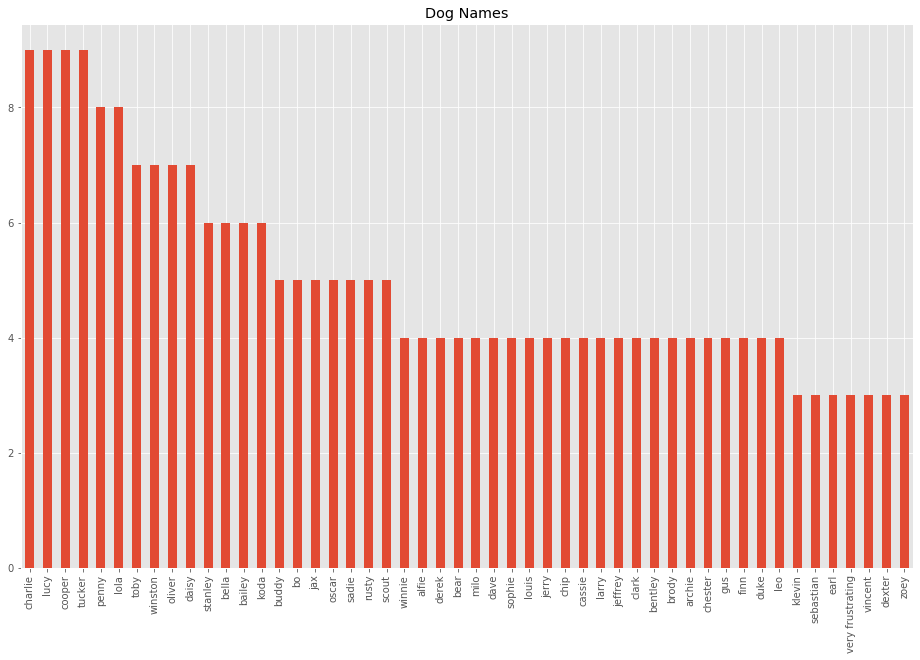

In [81]:
names_ind = names.index
enhanced_tweets_clean.query('name in @names_ind').name.value_counts().plot(kind= 'bar',figsize= (16,10))

plt.title('Dog Names');

- What is the least liked tweet ?

In [82]:
min_likes = enhanced_tweets_clean.favorite_count.min()
enhanced_tweets_clean.query('favorite_count == @min_likes')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
2014,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,11,10,-,floofer,11,72


- What is the most liked tweet ?

In [83]:
max_likes = enhanced_tweets_clean.favorite_count.max()
enhanced_tweets_clean.query('favorite_count == @max_likes')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
814,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,doggo realizing you can stand in a pool,doggo,78756,158097


- What is the average tweet likes ?

In [84]:
avg_likes = enhanced_tweets_clean.favorite_count.mean()
avg_likes

8609.447290640393

- What proportion of tweets have a likes bellow the mean ?

In [85]:
tweets_like_bellow_avg = enhanced_tweets_clean.query('favorite_count < @avg_likes')
tweets_like_bellow_avg.shape[0] / enhanced_tweets_count

0.6926108374384237

What proportion of tweets have likes equal or above the mean ?

In [86]:
tweets_like_above_avg = enhanced_tweets_clean.query('favorite_count >= @avg_likes')
tweets_like_above_avg.shape[0] / enhanced_tweets_count

0.30738916256157633

- What is the least retweeted tweet ?

In [87]:
min_retweets = enhanced_tweets_clean.retweet_count.min()
enhanced_tweets_clean.query('retweet_count == @min_retweets')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
2014,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,11,10,-,floofer,11,72


- What is the most retweeted tweet ?

In [88]:
max_retweets = enhanced_tweets_clean.retweet_count.max()
enhanced_tweets_clean.query('retweet_count == @max_retweets')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
814,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,doggo realizing you can stand in a pool,doggo,78756,158097


- What is the average tweet retweets ?

In [89]:
avg_retweets = enhanced_tweets_clean.retweet_count.mean()
avg_retweets

2597.847290640394

- What proportion of tweets are retweeted bellow the mean ?

In [90]:
tweets_retweet_bellow_avg = enhanced_tweets_clean.query('retweet_count < @avg_retweets')
tweets_retweet_bellow_avg.shape[0] / enhanced_tweets_count

0.7167487684729064

- What proportion of tweets are retweeted at or above the mean ?

In [91]:
tweets_retweet_above_avg = enhanced_tweets_clean.query('retweet_count >= @avg_retweets')
tweets_retweet_above_avg.shape[0] / enhanced_tweets_count

0.2832512315270936

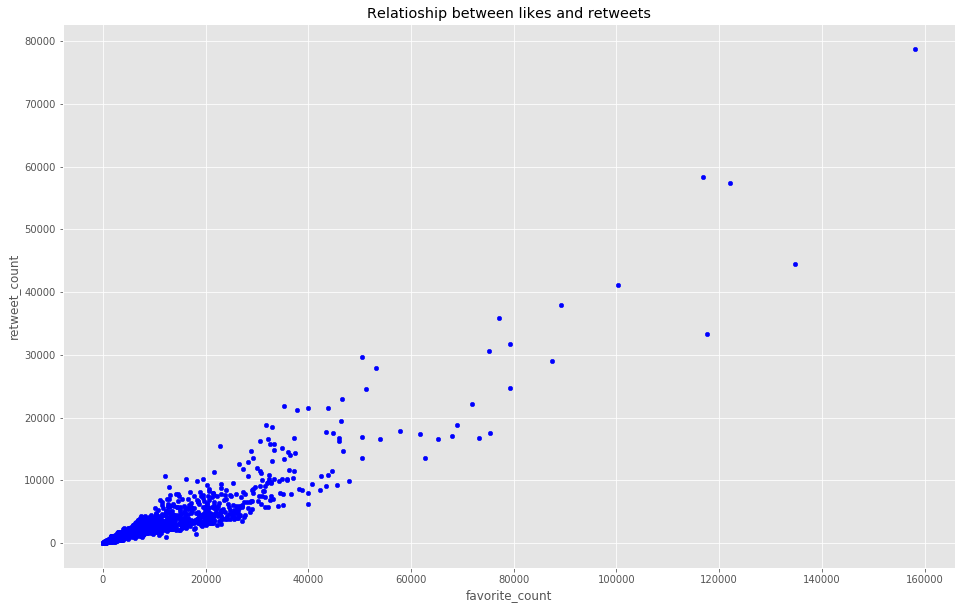

In [94]:
enhanced_tweets_clean.sort_values(by= 'timestamp').plot.scatter(x= 'favorite_count', y= 'retweet_count',
                                                                         figsize= (16,10), color= 'blue')

plt.title('Relatioship between likes and retweets');


- Is the timing a main cause of the low likes and retweets ?

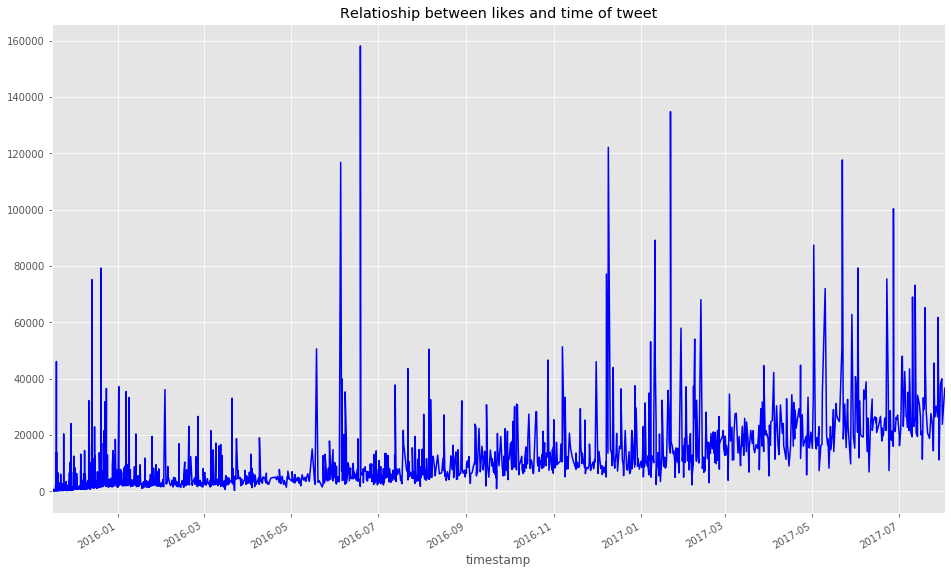

In [95]:
tweet_time = enhanced_tweets_clean.set_index('timestamp')
tweet_time = tweet_time.sort_index()
tweet_time.favorite_count.plot(figsize= (16,10), color= 'blue')

plt.title('Relatioship between likes and time of tweet');

In [96]:
tweet_time.groupby(tweet_time.index.hour).mean()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
timestamp,,,,,
0,7.691777e+17,11.181818,10.0,3512.166008,13043.996047
1,7.386607e+17,10.756272,10.0,2357.824373,7942.494624
2,7.010426e+17,10.334862,10.0,1757.298165,4878.348624
3,6.934775e+17,10.170588,10.0,1470.252941,4586.782353
4,6.842050e+17,10.277778,10.0,1134.888889,3310.100000
5,6.775167e+17,26.280000,10.0,1675.240000,4205.280000
6,7.081752e+17,11.250000,10.0,17421.500000,36810.750000
13,7.736921e+17,11.500000,10.0,3473.000000,14642.000000
14,7.174416e+17,10.777778,10.0,1367.333333,4515.888889


- Are the rated dogs above the mean liked more than the averge ?

In [97]:
tweets_rating_above_avg.query('favorite_count >= @avg_likes').shape[0] / tweets_rating_above_avg.shape[0]

0.5698529411764706

- Are they retweeted more than the average ?

In [98]:
tweets_rating_above_avg.query('retweet_count >= @avg_retweets').shape[0] / tweets_rating_above_avg.shape[0]

0.5073529411764706

- What about the bellow than average rated dogs, are they liked more than the average?

In [99]:
tweets_rating_bellow_avg.query('favorite_count >= @avg_likes').shape[0] / tweets_rating_bellow_avg.shape[0]

0.13097199341021418

- Are they retweeted more than the average ?

In [100]:
tweets_rating_bellow_avg.query('retweet_count >= @avg_retweets').shape[0] / tweets_rating_bellow_avg.shape[0]

0.1326194398682043

- What is the distribution of dog stages ?

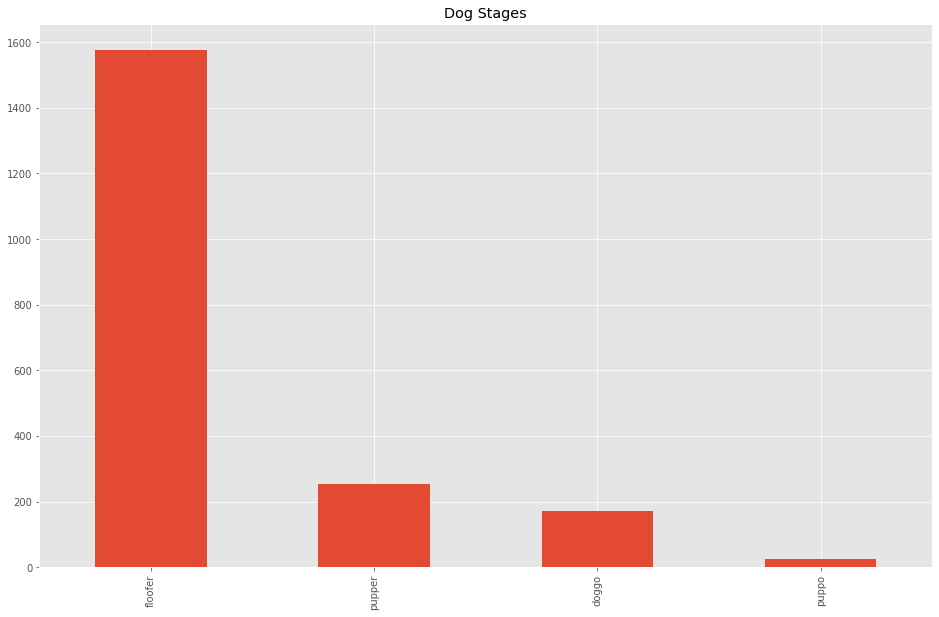

In [101]:
enhanced_tweets_clean.dog_stage.value_counts().plot(kind= 'bar',figsize= (16,10))

plt.title('Dog Stages');


It's mostly Floofer which is expected since it is the default one and most tweets doesn't have a dog stage stated.

- What dog stage have the highest rating, most likes and retweets ?

In [102]:
def get_stats(filters, filter_col = 'dog_stage'):
    """
    Calculate the means for each category , and compares with the Overall proportions.
    param:
    filters : list or an array of individual unique categories.
    filter_col: The column in enhanced_tweets that contain the categories
    
    Print and return a dictionary of the calculated statistics.
    """
    stats = {}
    for filt in filters:
        if filter_col == 'dog_stage':
            dogs = enhanced_tweets_clean.query('dog_stage == @filt')
            
        elif filter_col == 'tweet_id':
            # Retrieve the tweet_ids of the predicted breed in order to use it with our enhanced tweet table
            tweet_ids = img_predictions_clean[img_predictions_clean['first_prediction']['prediction'].isin([filt])].tweet.id.values

            dogs = enhanced_tweets_clean.query('tweet_id in @tweet_ids')

        # Calculate the means
        n_tweets = dogs.shape[0]
        mean_rating = dogs.rating_numerator.mean()
        mean_likes = dogs.favorite_count.mean()
        mean_retweets = dogs.retweet_count.mean()

        # Let's compare this breed with the overall means
        ratings = round(100 * (dogs.query('rating_numerator >= @avg_rating').shape[0]/n_tweets), 2)
        likes = round(100 * (dogs.query('favorite_count >= @avg_likes').shape[0]/n_tweets), 2)
        retweets = round(100 * (dogs.query('retweet_count >= @avg_retweets').shape[0]/n_tweets), 2)

        # Saving the results in our breeds_stat dictionary
        stats[filt] = {'count' : n_tweets,
                       'avg_rating' : mean_rating, 
                        'avg_likes' : mean_likes, 
                        'avg_retweets' : mean_retweets,
                        'above_all_avg_rating': ratings,
                        'above_all_avg_like': likes,
                        'above_all_avg_retweet': retweets}

        print('------------------------------{} Category------------------------------'.format(filt))
        print('There is {} tweets about The {} Category with: '.format(n_tweets, filt))
        print('- an average Rating of {}.'.format(mean_rating))
        print('- an average Likes of {}.'.format(mean_likes))
        print('- an average Retweets of {}.'.format(mean_retweets))
        print('* {}% of this Dog Category are rated above the overall mean'.format(ratings))
        print('* {}% of tweets for this Dog Category are liked above the overall mean.'.format(likes))
        print('* {}% of tweets for this Dog Category are retweeted above the overall mean.'.format(retweets))    
        
    return stats

In [103]:
stages = ['floofer', 'pupper', 'doggo', 'puppo']

stages_stat = get_stats(stages, filter_col = 'dog_stage')

------------------------------floofer Category------------------------------
There is 1577 tweets about The floofer Category with: 
- an average Rating of 12.18706404565631.
- an average Likes of 8304.100824350031.
- an average Retweets of 2466.0963855421687.
* 39.38% of this Dog Category are rated above the overall mean
* 30.31% of tweets for this Dog Category are liked above the overall mean.
* 27.52% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------pupper Category------------------------------
There is 254 tweets about The pupper Category with: 
- an average Rating of 10.838582677165354.
- an average Likes of 6734.9842519685035.
- an average Retweets of 2177.716535433071.
* 36.22% of this Dog Category are rated above the overall mean
* 18.9% of tweets for this Dog Category are liked above the overall mean.
* 21.65% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------doggo Category-----

- At what proportion did the algorthim predicted the image is a dog in its first prediction ?

In [104]:
first_is_dog = img_predictions_clean[(img_predictions_clean.first_prediction.is_a_dog == True )]
first_is_dog.shape[0] / img_predictions_count

0.7582417582417582

- At what proportion did the algorthim predicted the image is a dog in its second prediction ?

In [105]:
second_is_dog = img_predictions_clean[(img_predictions_clean.second_prediction.is_a_dog == True )]
second_is_dog.shape[0] / img_predictions_count

0.7655677655677655

- At what proportion did the algorthim predicted the image is a dog in its third prediction ?

In [106]:
third_is_dog = img_predictions_clean[(img_predictions_clean.third_prediction.is_a_dog == True )]
third_is_dog.shape[0] / img_predictions_count

0.7394034536891679

- At what proportion the algorthim didn't predicted the image is a dog in all the predictions ?

In [107]:
not_a_dog = img_predictions_clean[(img_predictions_clean['first_prediction']['is_a_dog'] == False) &
                                  (img_predictions_clean['second_prediction']['is_a_dog'] == False) &
                                 (img_predictions_clean['third_prediction']['is_a_dog'] == False)]
not_a_dog.shape[0]  / img_predictions_count

0.13867085295656725

- What are the most predicted breeds in its first prediction ?

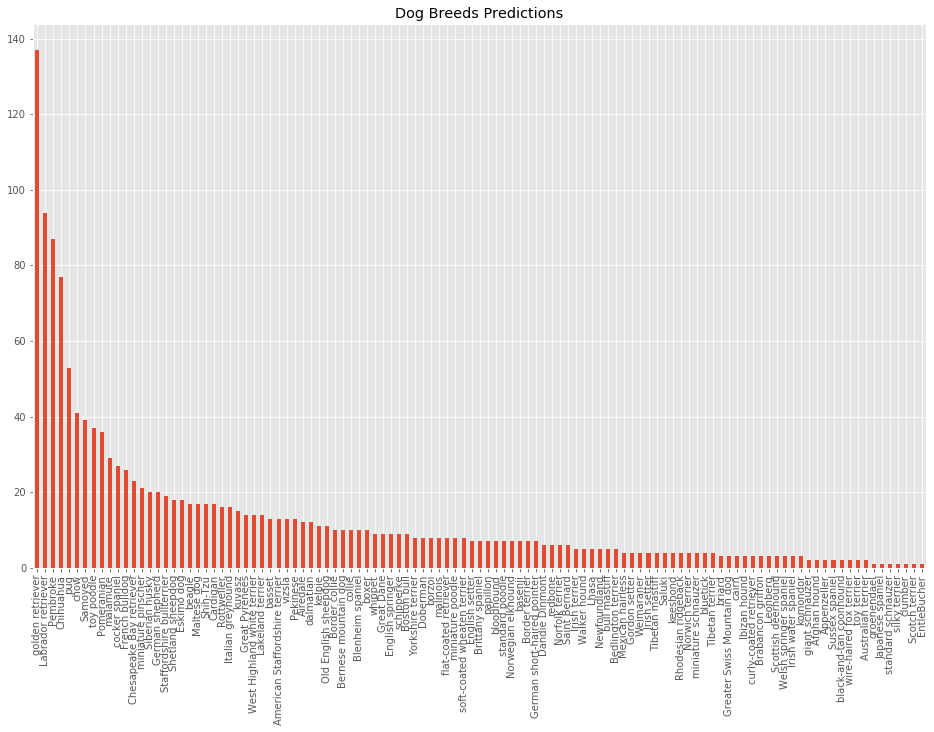

In [108]:
# Getting the number of occurences for each breed
breeds_count = first_is_dog['first_prediction']['prediction'].value_counts()

# Plotting the counts
breeds_count.plot(kind= 'bar', figsize= (16,10))

plt.title('Dog Breeds Predictions');


- How many breeds did it predicted during our first prediction?

In [109]:
breeds = first_is_dog['first_prediction']['prediction'].unique()

len(breeds)

111

- What is the predicted breed of highest rated dog ?

In [110]:
img_predictions_clean[img_predictions_clean['tweet']['id'] == 744234799360020481]

tweet               image                             \
                      id              folder                name number   
1221  744234799360020481  ext_tw_video_thumb  744234667679821824      1   

        first_prediction                     second_prediction             \
              prediction confidence is_a_dog        prediction confidence   
1221  Labrador retriever   0.825333     True          ice bear   0.044681   

              third_prediction                      
     is_a_dog       prediction confidence is_a_dog  
1221    False          whippet   0.018442     True

- Let's calculate some statistics about the ratings, likes and retweets for each breed:

In [111]:
breeds_stat = get_stats(breeds, filter_col = 'tweet_id')

------------------------------Welsh springer spaniel Category------------------------------
There is 3 tweets about The Welsh springer spaniel Category with: 
- an average Rating of 9.0.
- an average Likes of 2523.6666666666665.
- an average Retweets of 456.3333333333333.
* 0.0% of this Dog Category are rated above the overall mean
* 0.0% of tweets for this Dog Category are liked above the overall mean.
* 0.0% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------redbone Category------------------------------
There is 6 tweets about The redbone Category with: 
- an average Rating of 9.666666666666666.
- an average Likes of 3023.5.
- an average Retweets of 988.0.
* 33.33% of this Dog Category are rated above the overall mean
* 0.0% of tweets for this Dog Category are liked above the overall mean.
* 16.67% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------German shepherd Category--------------

------------------------------Blenheim spaniel Category------------------------------
There is 10 tweets about The Blenheim spaniel Category with: 
- an average Rating of 11.2.
- an average Likes of 8568.8.
- an average Retweets of 2289.2.
* 50.0% of this Dog Category are rated above the overall mean
* 30.0% of tweets for this Dog Category are liked above the overall mean.
* 30.0% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Pembroke Category------------------------------
There is 87 tweets about The Pembroke Category with: 
- an average Rating of 11.482758620689655.
- an average Likes of 10737.149425287356.
- an average Retweets of 2876.7471264367814.
* 55.17% of this Dog Category are rated above the overall mean
* 37.93% of tweets for this Dog Category are liked above the overall mean.
* 39.08% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Chesapeake Bay retriever Category----

------------------------------borzoi Category------------------------------
There is 8 tweets about The borzoi Category with: 
- an average Rating of 10.25.
- an average Likes of 5975.125.
- an average Retweets of 1657.375.
* 25.0% of this Dog Category are rated above the overall mean
* 12.5% of tweets for this Dog Category are liked above the overall mean.
* 12.5% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------beagle Category------------------------------
There is 17 tweets about The beagle Category with: 
- an average Rating of 10.352941176470589.
- an average Likes of 4352.0.
- an average Retweets of 1255.4117647058824.
* 17.65% of this Dog Category are rated above the overall mean
* 17.65% of tweets for this Dog Category are liked above the overall mean.
* 17.65% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Yorkshire terrier Category------------------------------
There is 8 t

------------------------------basset Category------------------------------
There is 13 tweets about The basset Category with: 
- an average Rating of 11.153846153846153.
- an average Likes of 12872.384615384615.
- an average Retweets of 2893.230769230769.
* 46.15% of this Dog Category are rated above the overall mean
* 46.15% of tweets for this Dog Category are liked above the overall mean.
* 46.15% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Brabancon griffon Category------------------------------
There is 3 tweets about The Brabancon griffon Category with: 
- an average Rating of 10.0.
- an average Likes of 812.3333333333334.
- an average Retweets of 256.6666666666667.
* 0.0% of this Dog Category are rated above the overall mean
* 0.0% of tweets for this Dog Category are liked above the overall mean.
* 0.0% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Eskimo dog Category---

------------------------------Border collie Category------------------------------
There is 10 tweets about The Border collie Category with: 
- an average Rating of 11.4.
- an average Likes of 9650.8.
- an average Retweets of 2273.7.
* 60.0% of this Dog Category are rated above the overall mean
* 40.0% of tweets for this Dog Category are liked above the overall mean.
* 20.0% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Great Pyrenees Category------------------------------
There is 14 tweets about The Great Pyrenees Category with: 
- an average Rating of 11.5.
- an average Likes of 11888.857142857143.
- an average Retweets of 4177.571428571428.
* 57.14% of this Dog Category are rated above the overall mean
* 42.86% of tweets for this Dog Category are liked above the overall mean.
* 35.71% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------schipperke Category---------------------------

------------------------------Great Dane Category------------------------------
There is 9 tweets about The Great Dane Category with: 
- an average Rating of 11.11111111111111.
- an average Likes of 5782.333333333333.
- an average Retweets of 1612.0.
* 44.44% of this Dog Category are rated above the overall mean
* 33.33% of tweets for this Dog Category are liked above the overall mean.
* 11.11% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Tibetan mastiff Category------------------------------
There is 4 tweets about The Tibetan mastiff Category with: 
- an average Rating of 12.25.
- an average Likes of 11196.5.
- an average Retweets of 3709.5.
* 100.0% of this Dog Category are rated above the overall mean
* 50.0% of tweets for this Dog Category are liked above the overall mean.
* 50.0% of tweets for this Dog Category are retweeted above the overall mean.
------------------------------Scotch terrier Category-------------------------

- Since we have 111 breeds, we can't see all the text here, so let's do some plottings:

In [112]:
# First we have to create a DataFrame from our breeds_stat dict for a better reading and an easier manipulations
df_breeds = pd.DataFrame(breeds_stat).T
df_breeds

,count,avg_rating,avg_likes,avg_retweets,above_all_avg_rating,above_all_avg_like,above_all_avg_retweet
Welsh springer spaniel,3.0,9.000000,2523.666667,456.333333,0.00,0.00,0.00
redbone,6.0,9.666667,3023.500000,988.000000,33.33,0.00,16.67
German shepherd,20.0,11.000000,9375.750000,2357.300000,50.00,40.00,35.00
Rhodesian ridgeback,4.0,9.750000,3751.250000,690.000000,25.00,25.00,0.00
miniature pinscher,21.0,10.666667,8255.857143,2195.857143,42.86,33.33,28.57
...,...,...,...,...,...,...,...
wire-haired fox terrier,2.0,11.500000,7870.000000,2615.500000,50.00,50.00,50.00
Saluki,4.0,12.500000,22429.000000,4565.250000,75.00,75.00,75.00
silky terrier,1.0,12.000000,6767.000000,1668.000000,100.00,0.00,0.00
clumber,1.0,27.000000,6718.000000,1661.000000,100.00,0.00,0.00


In [113]:
df_breeds.describe()

,count,avg_rating,avg_likes,avg_retweets,above_all_avg_rating,above_all_avg_like,above_all_avg_retweet
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,12.990991,10.864122,7649.119454,2119.046889,38.522162,27.525676,23.480450
std,19.433100,1.844889,4295.343632,1272.989416,24.021704,20.350857,19.253843
min,1.000000,5.000000,812.333333,256.666667,0.000000,0.000000,0.000000
25%,4.000000,10.285714,4494.339286,1268.205882,22.430000,12.500000,9.545000
50%,7.000000,10.833333,6769.400000,1822.166667,37.500000,26.090000,22.220000
75%,14.000000,11.279630,10016.047619,2628.575758,50.000000,39.445000,35.355000
max,137.000000,27.000000,22429.000000,7101.000000,100.000000,100.000000,100.000000


In [114]:
df_breeds = df_breeds.sort_values(by= 'count', ascending= False)

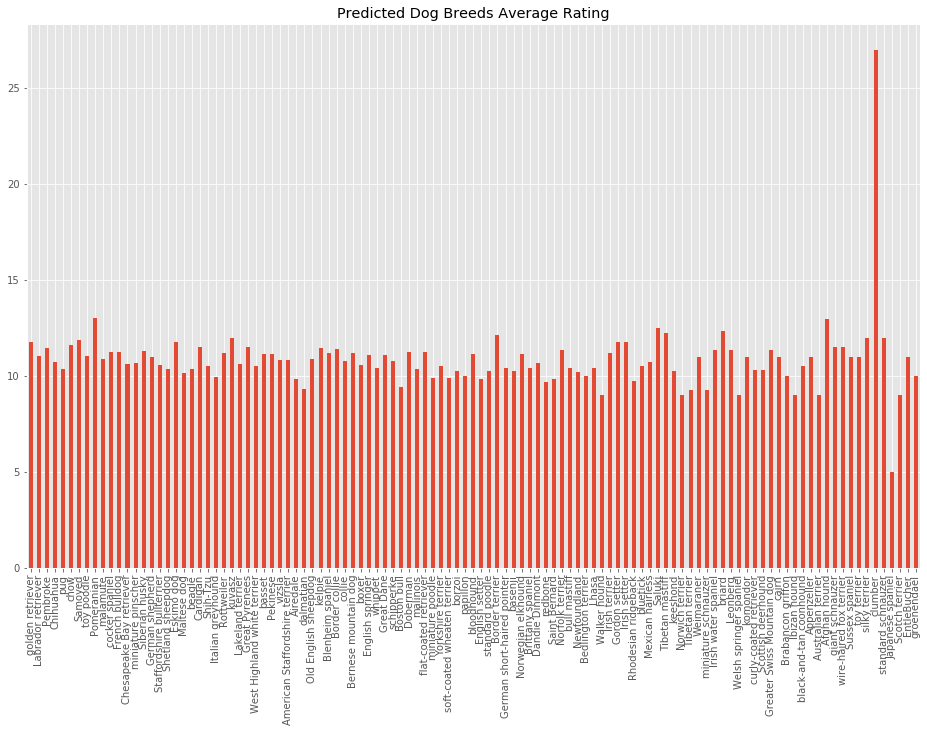

In [115]:
df_breeds.avg_rating.plot(kind= 'bar',figsize= (16,10))
plt.title('Predicted Dog Breeds Average Rating');

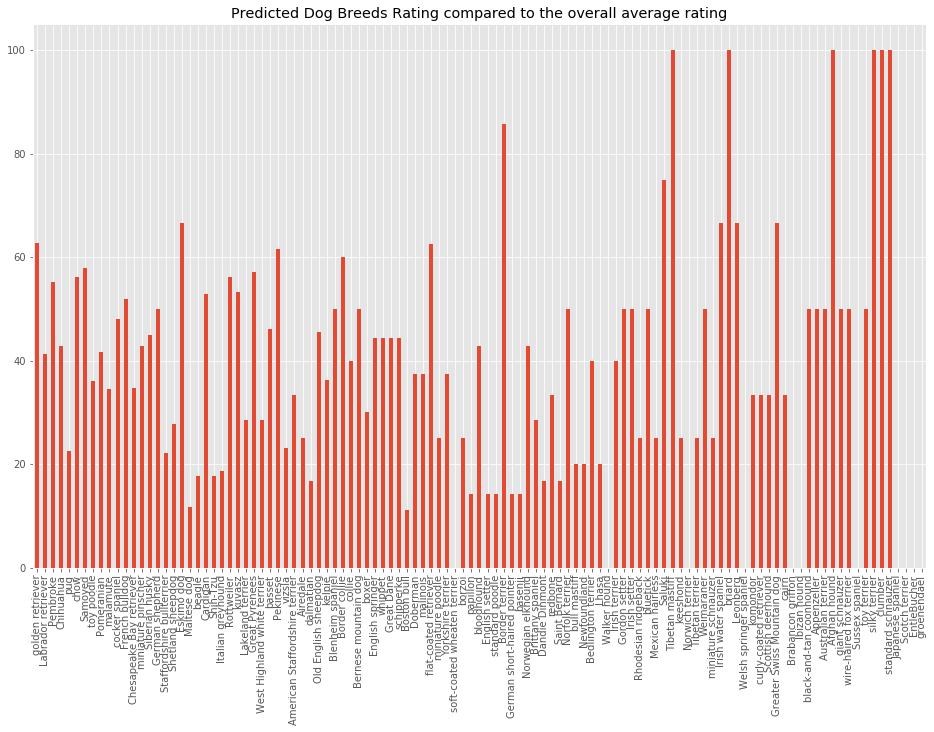

In [116]:
df_breeds.above_all_avg_rating.plot(kind= 'bar',figsize= (16,10))
plt.title('Predicted Dog Breeds Rating compared to the overall average rating');

In [117]:
df_breeds[df_breeds.above_all_avg_rating == 100]

,count,avg_rating,avg_likes,avg_retweets,above_all_avg_rating,above_all_avg_like,above_all_avg_retweet
Tibetan mastiff,4.0,12.250000,11196.5,3709.500000,100.0,50.00,50.00
briard,3.0,12.333333,8781.0,2637.333333,100.0,33.33,33.33
Afghan hound,2.0,13.000000,20662.0,7101.000000,100.0,100.00,100.00
silky terrier,1.0,12.000000,6767.0,1668.000000,100.0,0.00,0.00
clumber,1.0,27.000000,6718.0,1661.000000,100.0,0.00,0.00
standard schnauzer,1.0,12.000000,1864.0,804.000000,100.0,0.00,0.00


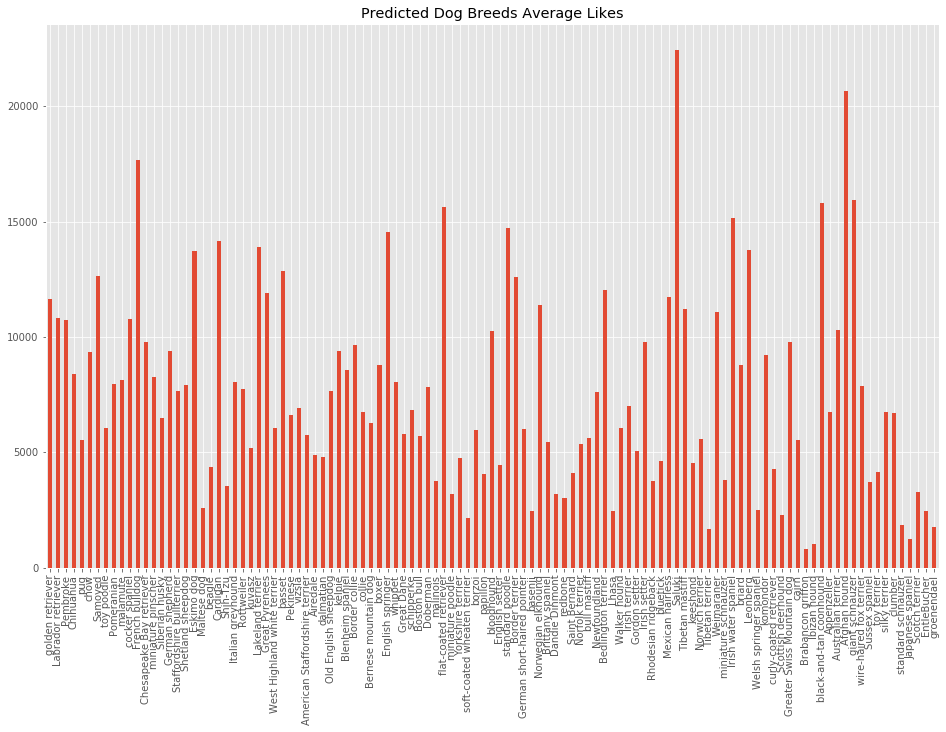

In [118]:
df_breeds.avg_likes.plot(kind= 'bar',figsize= (16,10))

plt.title('Predicted Dog Breeds Average Likes');

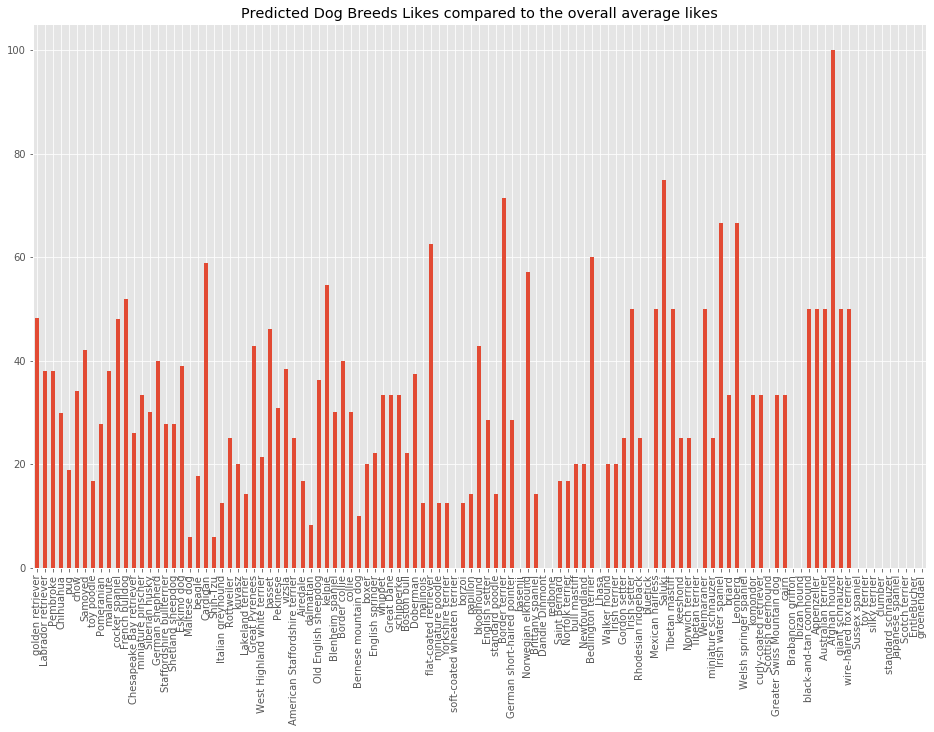

In [119]:
df_breeds.above_all_avg_like.plot(kind= 'bar',figsize= (16,10))

plt.title('Predicted Dog Breeds Likes compared to the overall average likes');

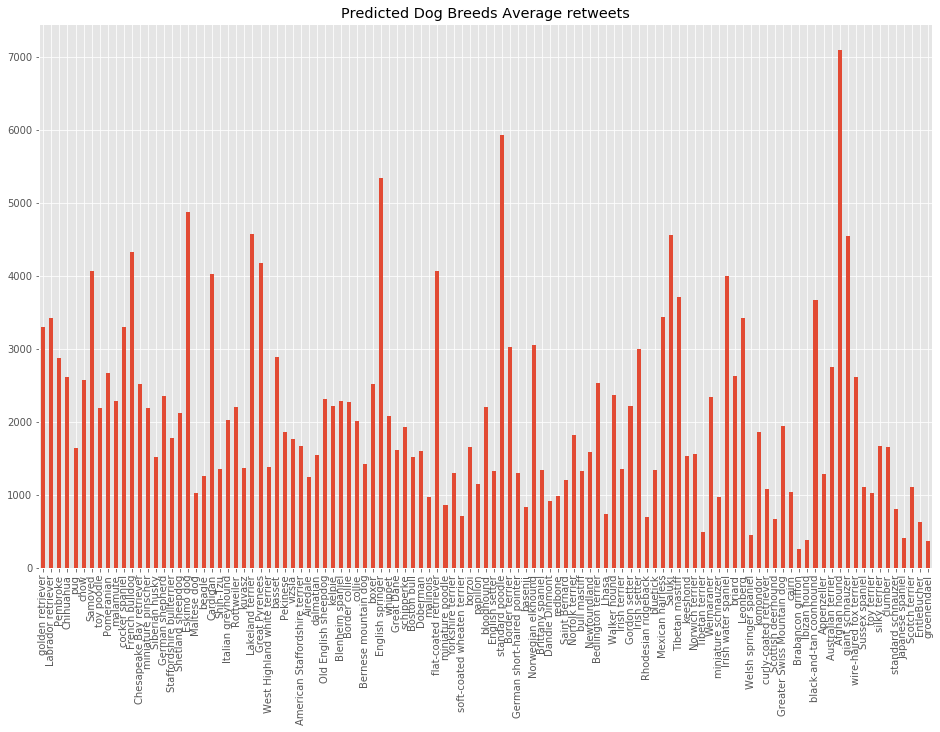

In [120]:
df_breeds.avg_retweets.plot(kind= 'bar',figsize= (16,10))
plt.title('Predicted Dog Breeds Average retweets');


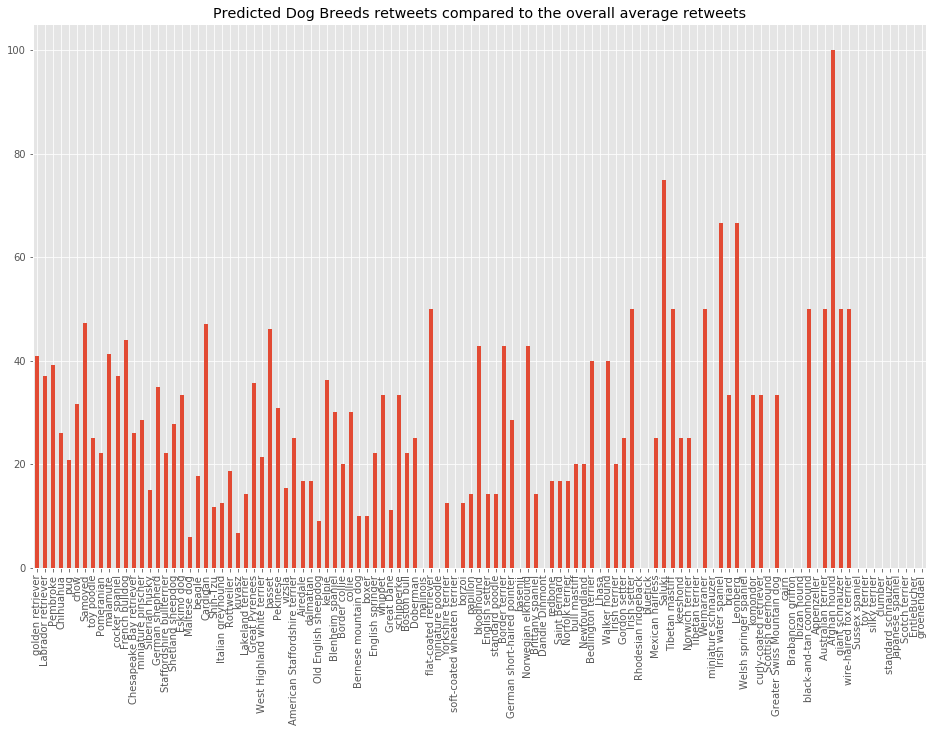

In [121]:
df_breeds.above_all_avg_retweet.plot(kind= 'bar',figsize= (16,10))

plt.title('Predicted Dog Breeds retweets compared to the overall average retweets');

<a id='conclusion'></a>
### Conclusion:

Although dogs are rated above 10 in general, there is some 367 exceptions rated between 5 and 9 which represents 18% of our dataset mostly because the picture is very odd or the main focus in the picture is not about dogs, even the classification algorithm did a good job predicting dogs where they are clear enought in the pictures and badly where the dogs are not well captured.

- The most repeated dog names are: tucker, cooper, charlie, lucy with 9 occurances each.

- The average rating for all dogs is 11.93/10, 40.20 % of dogs in our dataset are above this number and the best rated one got 1776/10, his picture also is the most favorited and the most retweeted one. 

- Tweet favorite count and retweets are corelated, the least liked and retweeted tweets occurs generally around 4:00 Am. 

- The tweets of dogs rated bellow the mean are the least liked and/or retweeted with only 13,09 % above the average likes and 13.26 % above the average retweets. 

- Opposed to Puppo, The pupper category has the least above average ratings, likes and retweets.

- The number of dogs per breed doesn't seem to have a great impact on our metrics, for example the golden and labrador retrievers are first and second respectively br the number of dogs belonging to each breed however they are not the highest rated, liked or retweeted, some other breeds like sussex spaniel, japanese spaniel, silky terrier, toy terrier and entlebucher are all bellow the average.

- The average rating for each dog breed is bellow 15, with one exception the dumber category which is the highest average rated breed With above 25/10, 100 % of dogs in this category are rated above the overall average rating, five other breeds are also, namely : tibetan mastiff, briard, afghan hound, silky terrier and standard shnauzer.

- The hishest likes between breeds goes for the saluki breed followed by the afghan hound and then french bulldog, comparing to the overall likes only the afghan hound dogs are 100% liked above the overall mean.

- The tweets about afghan hound dogs are the hishest retweeted one and are all above the overall average retweets.
